In [ ]:
import sys
python = sys.executable # get python executable path
print(python)

for i in ["numpy",  "scipy", "matplotlib", "pandas", "opencv-python", "opencv-contrib-python"]: # declare what packages we need
  print(f"Installing: {i}")
  ! $python -m pip install $i # install packages calling bash command from the notebook, e.g. "/usr/bin/python -m pip install numpy"

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request

/usr/bin/python3
Installing: numpy
Installing: scipy
Installing: matplotlib
Installing: pandas
Installing: opencv-python
Installing: opencv-contrib-python


## Загрузка изображения

In [ ]:
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
urllib.request.urlretrieve(url, "image.jpg")
!ls


image.jpg  sample_data


In [ ]:
import matplotlib.image as mpimg
import math

In [ ]:
def dispaly_side_by_side(img1, img2):
    both = Image.new('RGB', (img1.size[0]+img2.size[0], max(img1.size[1], img2.size[1])))

    both.paste(img1)
    both.paste(img2, (img1.size[0]+1, 1))

    return both

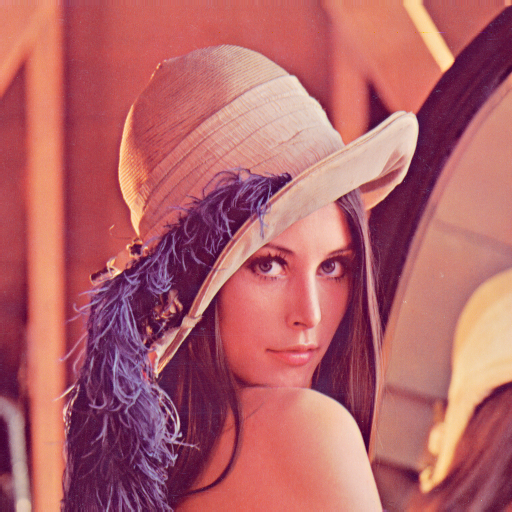

In [ ]:
img = Image.open("image.jpg")
imgn = np.array(img)
img

In [ ]:
img.size, imgn.shape

((512, 512), (512, 512, 3))

# Задание 1 Изменение размера изображения

In [ ]:
def resize_nn(img: np.ndarray, size_factor: float = 2) -> np.ndarray:
    """
    Parameters
    ----------
    img: np.ndarray
        Source image presented in numpy array-like object

    size_factor: float = 2
        The scaling factor. Should be greater than 1
    """
    assert size_factor > 1, 'Parameter `size_factor` should be greater than 1'

    def get_upscaled_param(param):
        return int(math.floor(param*size_factor))

    tmp = np.zeros((*[get_upscaled_param(p) for p in img.shape[:2]], 3))

    sx, sy = 1/size_factor, 1/size_factor

    for y in range(len(tmp)):
        for x in range(len(tmp[y])):
            for z in range(len(tmp[y][x])):
                proj_x = math.floor(x * sx)
                proj_y = math.floor(y * sy)
                tmp[y][x][z] = img[proj_y][proj_x][z]

    return tmp


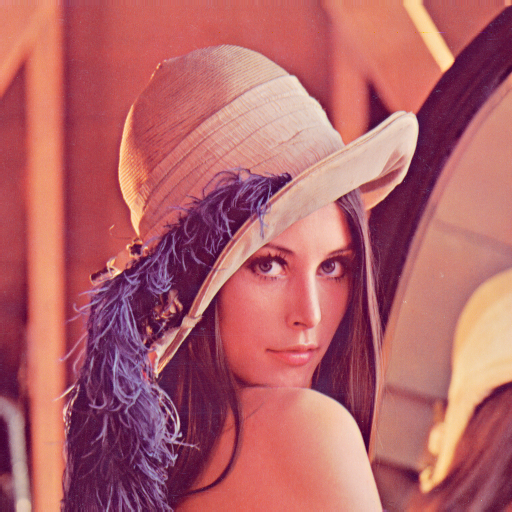

In [ ]:
img

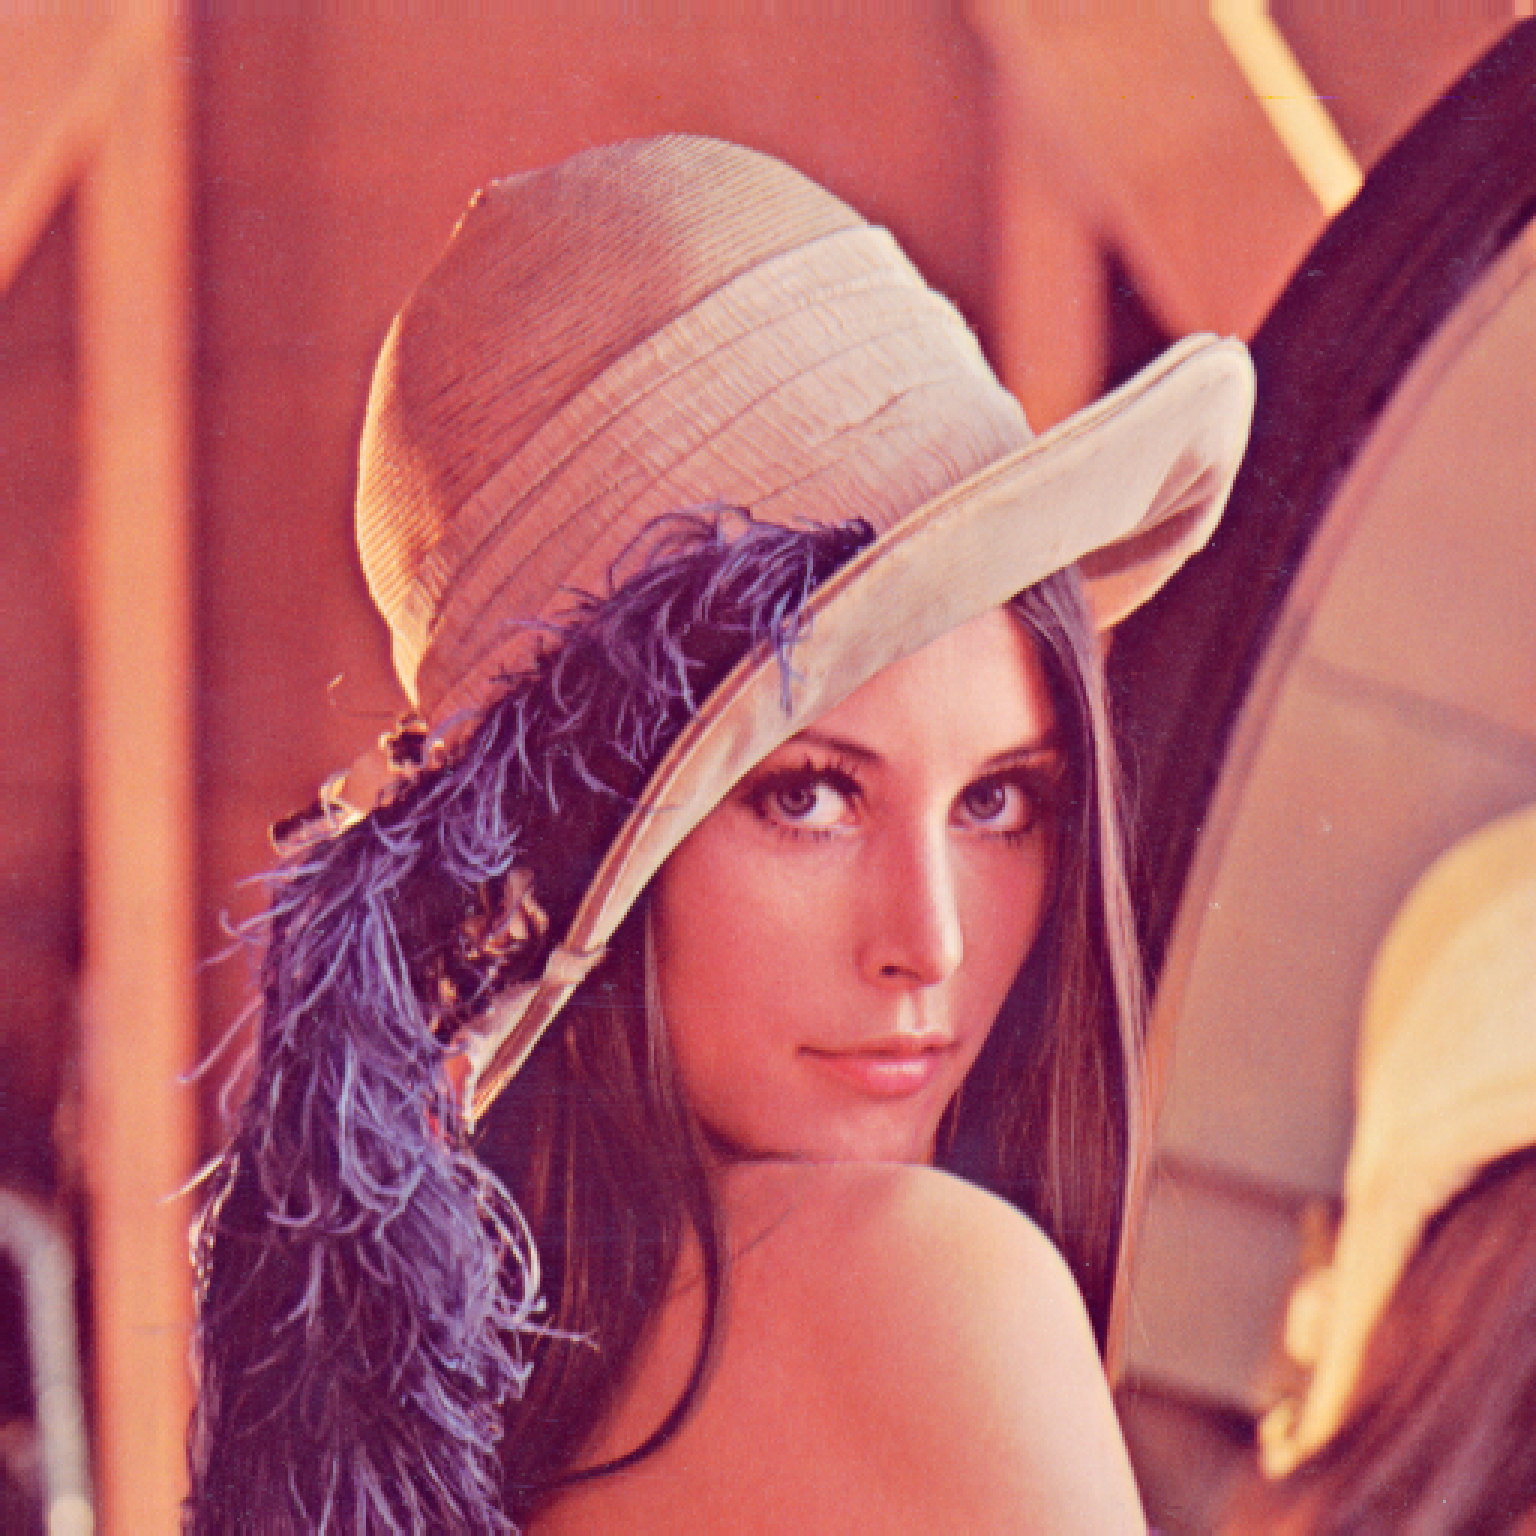

In [ ]:
Image.fromarray(resize_nn(imgn, 3).astype(np.uint8))

In [ ]:
def resize_bilinear(img: np.ndarray, size_factor: float = 2) -> np.ndarray:
    """
    Parameters
    ----------
    img: np.ndarray
        Source image presented in numpy array-like object

    size_factor: float = 2
        The scaling factor. Should be greater than 1
    """
    assert size_factor > 1, 'Parameter `size_factor` should be greater than 1'

    def get_upscaled_param(param):
        return int(math.floor(param*size_factor))

    tmp = np.zeros((*[get_upscaled_param(p) for p in img.shape[:2]], 3))

    sx, sy = 1/size_factor, 1/size_factor

    def bln_interpolation(x, y, z):
        lx, ty = int(x), int(y)
        rx, by = min(lx+1, img.shape[1]-1), min(ty+1, img.shape[0]-1)
        d1, d3 = x - lx, y - ty
        d2 = rx - x
        d4 = by - y


        v1 = img[ty, lx, z]
        v2 = img[ty, rx, z]
        v3 = img[by, lx, z]
        v4 = img[by, rx, z]

        q = v1*(d2*d4) + v2*(d1*d4) + v3*(d2*d3) + v4*(d1*d3)

        return q


    for y in range(len(tmp)):
        for x in range(len(tmp[y])):
            for z in range(len(tmp[y][x])):
                proj_x = x * sx
                proj_y = y * sy
                tmp[y][x][z] = bln_interpolation(proj_x, proj_y, z)

    return tmp


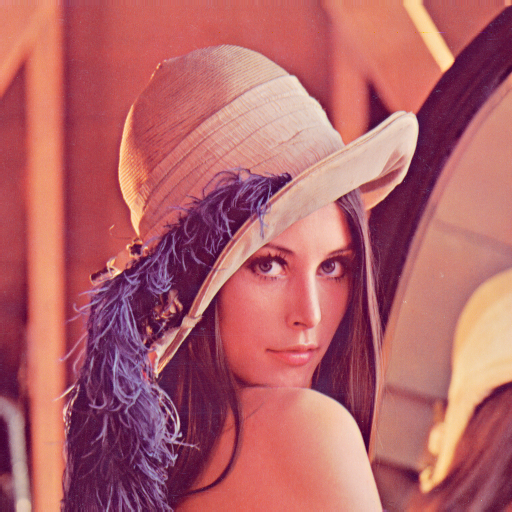

In [ ]:
img

In [ ]:
Image.fromarray(resize_bilinear(imgn, 3).astype(np.uint8))

In [ ]:
dispaly_side_by_side(Image.fromarray(resize_nn(imgn, 3).astype(np.uint8)), Image.fromarray(resize_bilinear(imgn, 3).astype(np.uint8)))

# Задание 2 Сжатие изображения



In [ ]:
def downsample_1(img, size_factor):
    width, height = img.size
    new_width = int(width / size_factor)
    new_height = int(height / size_factor)
    img_ds1 = img.resize((new_width, new_height), Image.NEAREST)
    return img_ds1

def downsample_2(img, size_factor):
    width, height = img.size
    new_width = int(width / size_factor)
    new_height = int(height / size_factor)
    img_array = np.array(img)
    img_ds2_array = img_array.reshape((new_height, size_factor, new_width, size_factor, 3)).mean(axis=(1, 3)).astype(np.uint8)
    img_ds2 = Image.fromarray(img_ds2_array)
    return img_ds2


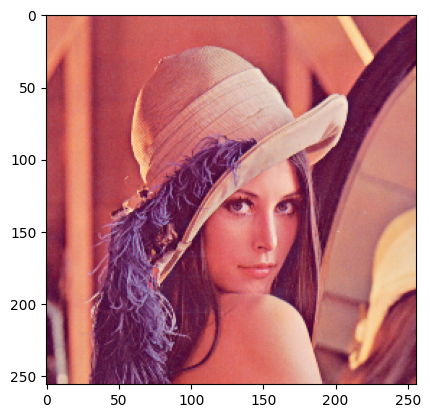

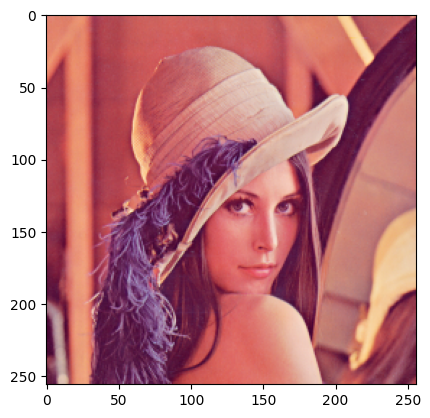

In [ ]:
img_ds1 = downsample_1(img, 2)

plt.imshow(img_ds1)
plt.show()


img_ds2 = downsample_2(img, 2)

plt.imshow(img_ds2)
plt.show()

# Задание 3 Изменение яркости

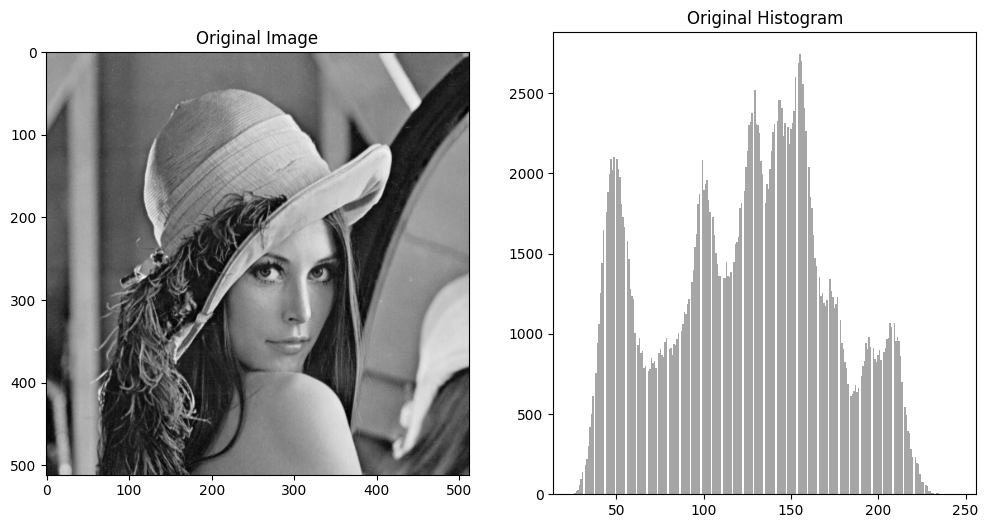

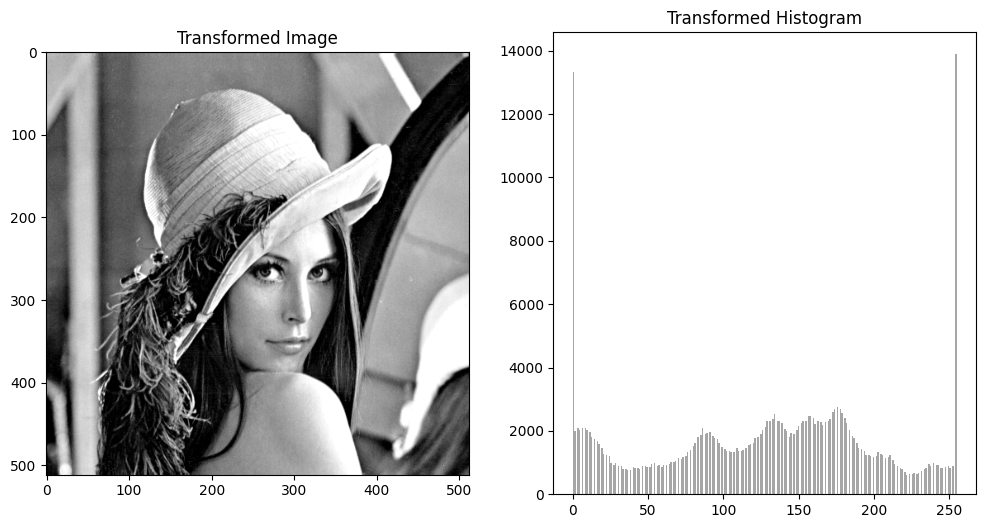

In [ ]:
def linear_hist_transform(img, percent=0.05):
    img_array = np.array(img)
    lower_bound = np.percentile(img_array, percent)
    upper_bound = np.percentile(img_array, 100 - percent)
    img_array = (img_array - lower_bound) / (upper_bound - lower_bound) * 255
    img_array = np.clip(img_array, 0, 255).astype(np.uint8)
    return Image.fromarray(img_array)

img = Image.open('image.jpg').convert('L')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.hist(np.array(img).ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Original Histogram')
plt.show()

img_transformed = linear_hist_transform(img, percent=5)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img_transformed, cmap='gray')
plt.title('Transformed Image')
plt.subplot(1, 2, 2)
plt.hist(np.array(img_transformed).ravel(), bins=256, color='gray', alpha=0.7)
plt.title('Transformed Histogram')
plt.show()

# Задание 4 Гамма коррекция

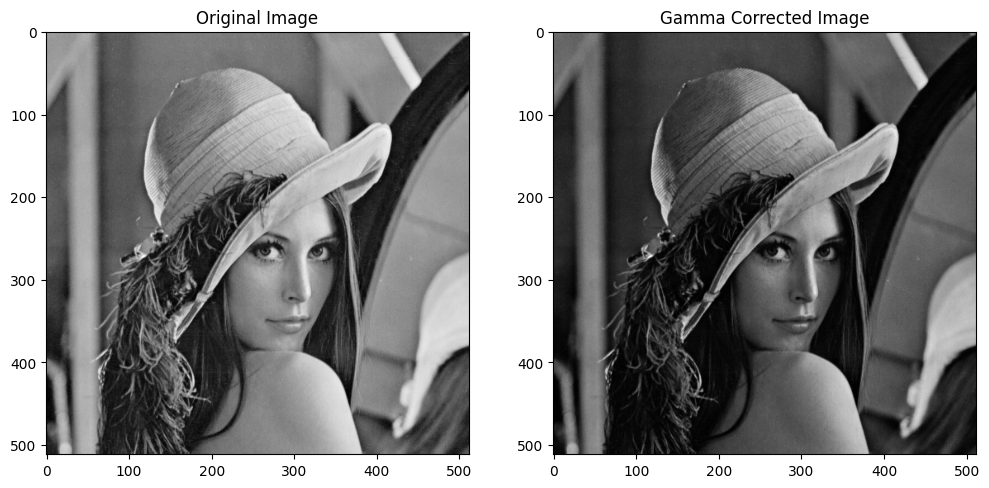

In [ ]:
def gamma_transform(img, gamma):
    img_array = np.array(img) / 255.0
    img_gamma = np.power(img_array, gamma)
    return Image.fromarray(np.uint8(img_gamma * 255))

img = Image.open('image.jpg').convert('L')

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

img_gamma = gamma_transform(img, 2.0)

plt.subplot(1, 2, 2)
plt.imshow(img_gamma, cmap='gray')
plt.title('Gamma Corrected Image')
plt.show()

# Задание 5 Эквализация гистограммы

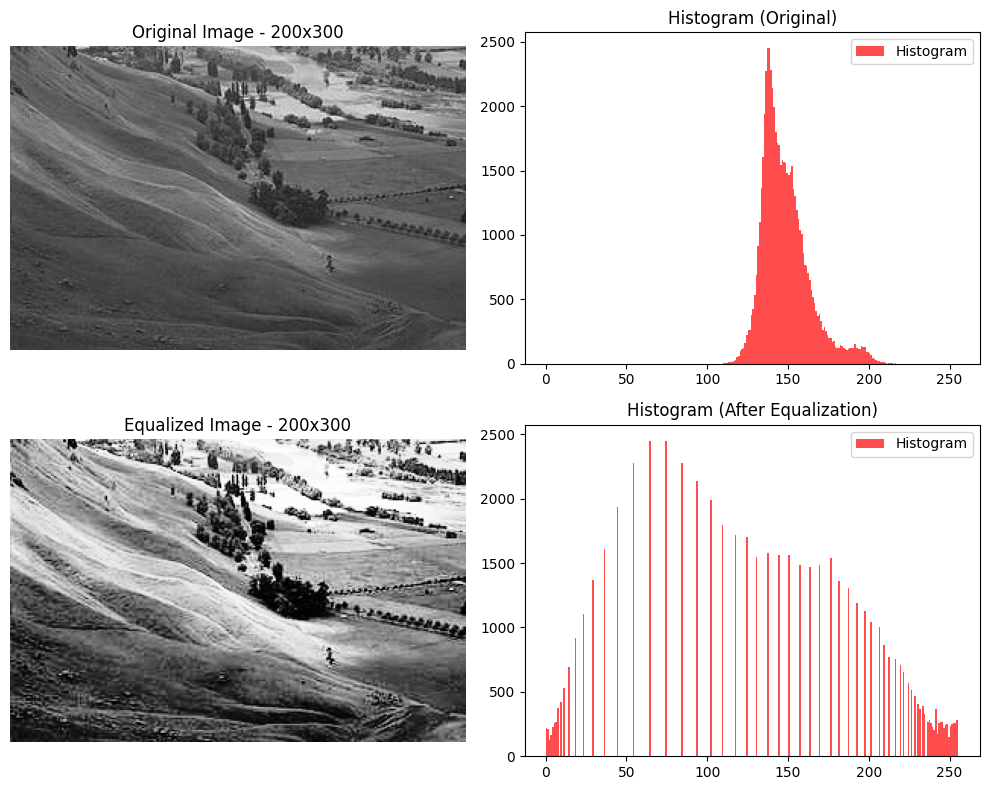

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

def hist_eq(img):
    img_array = img.flatten()
    hist, bins = np.histogram(img_array, 256, [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max() / cdf.max()
    mask = cdf != 0
    cdf_normalized[mask] = (cdf_normalized[mask] - cdf_normalized[mask].min())*255 / (cdf_normalized[mask].max()-cdf_normalized[mask].min())
    img_eq = cdf_normalized[img]
    return img_eq.astype('uint8')


img_heq = cv2.imread("image_heq.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(img_heq, cmap='gray')
plt.title(f'Original Image - {img_heq.shape[0]}x{img_heq.shape[1]}')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.hist(img_heq.ravel(), 256, [0, 256], color='red', alpha=0.7, label='Histogram')
plt.title('Histogram (Original)')
plt.legend()


equ = hist_eq(img_heq)


plt.subplot(2, 2, 3)
plt.imshow(equ, cmap='gray')
plt.title(f'Equalized Image - {equ.shape[0]}x{equ.shape[1]}')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.hist(equ.ravel(), 256, [0, 256], color='red', alpha=0.7, label='Histogram')
plt.title('Histogram (After Equalization)')
plt.legend()

plt.tight_layout()
plt.show()
